### <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: left; line-height: 0.45;background-color: #E94B3C"><b>Telecom Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! 

Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth! 

### Aim :

- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

### <center>Dataset Attributes</center>
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

## What Problem We Have and Which Metric to Use?


**Based on the data and data dictionary, We have a classification problem.**
* We wil make classification on the target variable Churn
* we will build a model to get best classification possible on the target variable.
* For that we will look at the balance of the target variable.
* As we will see later, our target variable has imblanced data
* For that reason we are not going to use Accuracy score,
* Based on the problem on the hand, we will use Recall score.

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # For creating plots 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 

sns.set_style("dark")
matplotlib.style.use('seaborn-notebook')
%matplotlib inline

# for HD visualizations
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

### Let us read the data file in the python notebook

In [243]:
telecom_df = pd.read_csv(r"C:\Data\churn_dataset.csv",skipinitialspace = True)

In [244]:
def df_description(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    return summary

In [245]:
df_description(telecom_df)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,gender,object,0,2,Female,Male,Male
2,SeniorCitizen,int64,0,2,0,0,0
3,Partner,object,0,2,Yes,No,No
4,Dependents,object,0,2,No,No,No
5,tenure,int64,0,73,1,34,2
6,PhoneService,object,0,2,No,Yes,Yes
7,MultipleLines,object,0,3,No phone service,No,No
8,InternetService,object,0,3,DSL,DSL,DSL
9,OnlineSecurity,object,0,3,No,Yes,Yes


In [246]:
telecom_df.head(2)
telecom_df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


(7043, 21)

In [247]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [248]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Let's explore the data to see if there are any missing values.


In [249]:
telecom_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. 

           Let us replace with median in 11 rows from our data set

In [250]:
total_median = telecom_df.TotalCharges.median()

In [251]:
telecom_df.TotalCharges = telecom_df.TotalCharges.fillna(total_median)

In [252]:
telecom_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Exploration
Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.



### **A) Demographics** - 

Let us first understand the gender, age range, patner and dependent status of the customers

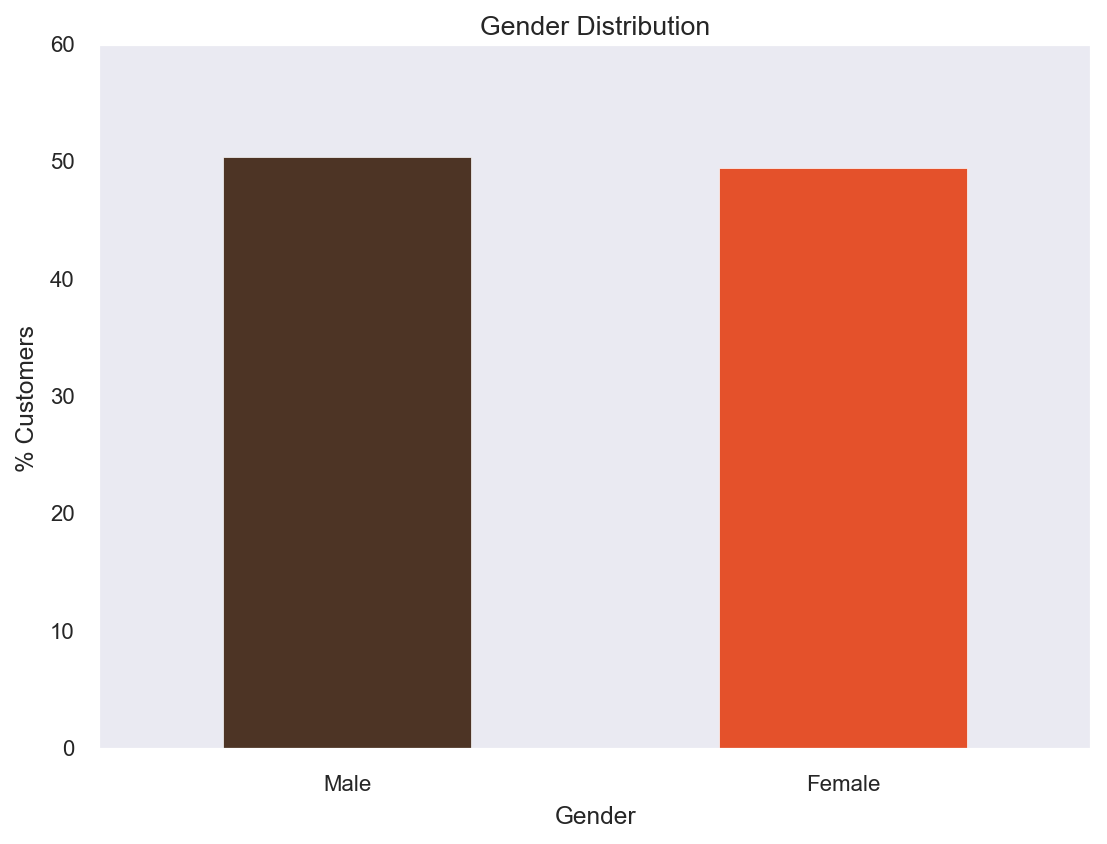

In [253]:
colors = ['#4D3425','#E4512B','#0000FF',"#00FF00"]
gender = (telecom_df['gender'].value_counts()*100.0 /len(telecom_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,color = colors)
gender.set_title('Gender Distribution');
gender.set_xlabel('Gender');
gender.set_ylabel('% Customers');


**Gender Distribution** - About half of the customers in our data set are male while the other half are female

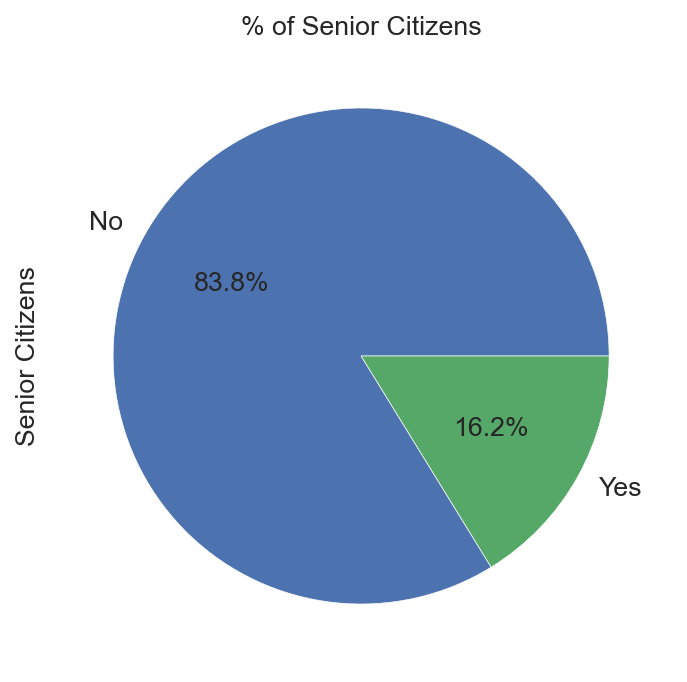

In [254]:
Senior_Citizens = (telecom_df['SeniorCitizen'].value_counts()*100.0 /len(telecom_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

Senior_Citizens.set_ylabel('Senior Citizens',fontsize = 12);
Senior_Citizens.set_title('% of Senior Citizens', fontsize = 12);

**Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

### **B) Customer Account Information**: 
    
   Let u now look at the tenure, contract


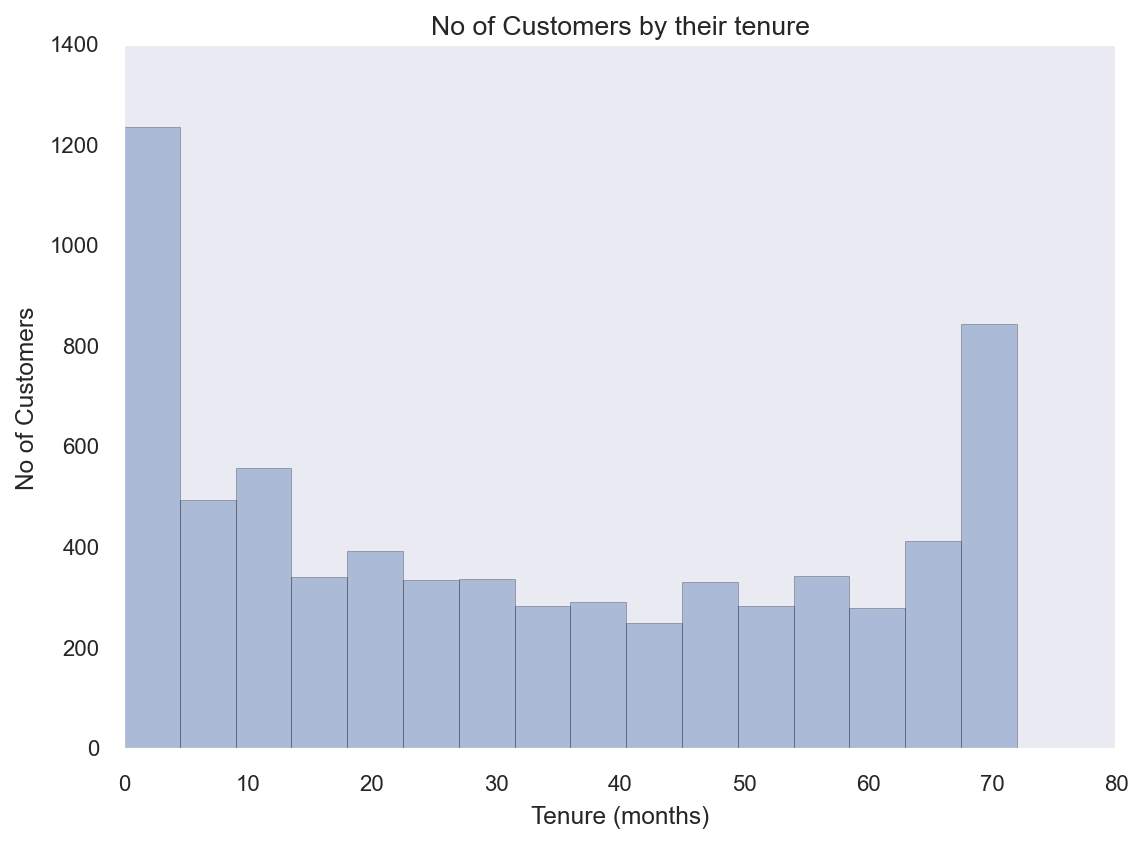

In [255]:
Tenure = sns.distplot(telecom_df['tenure'], hist=True,kde=False,hist_kws={'edgecolor':'black'})

Tenure.set_ylabel('No of Customers')
Tenure.set_xlabel('Tenure (months)');
Tenure.set_title('No of Customers by their tenure');

**1. Tenure** : After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

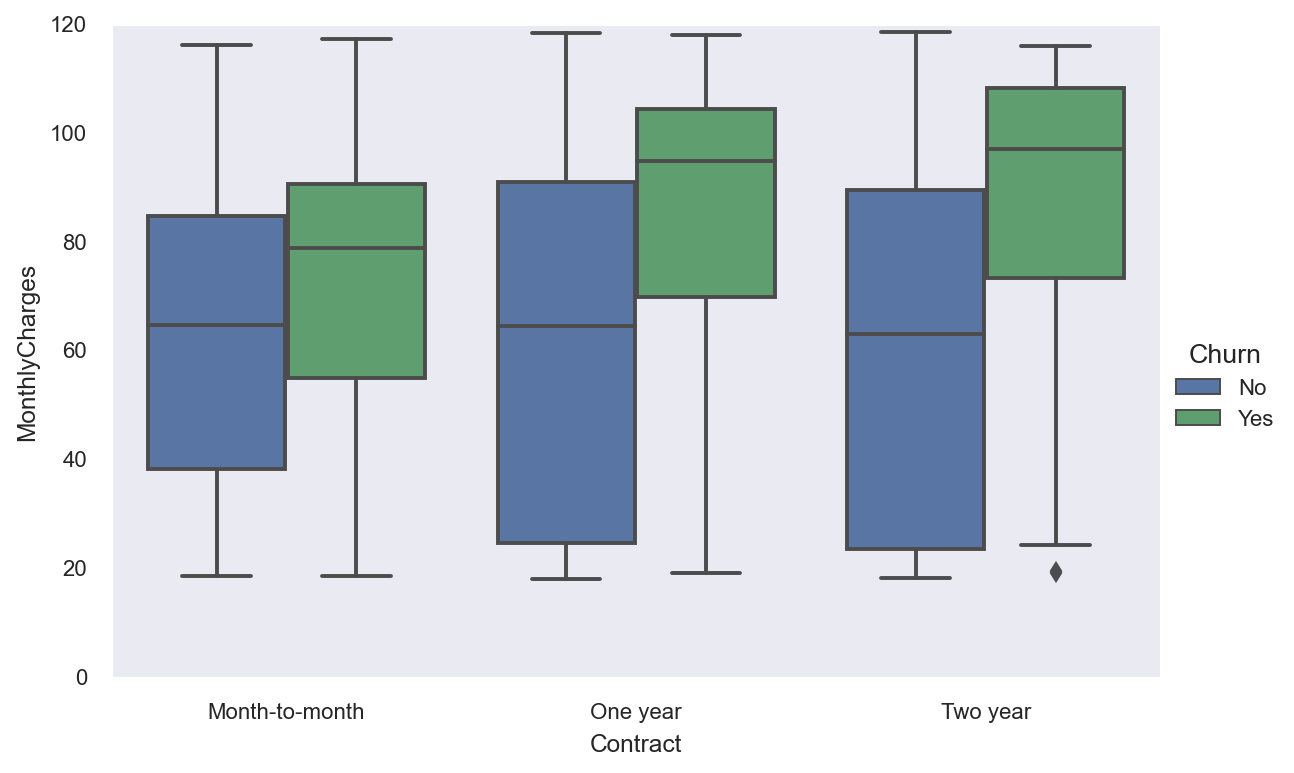

In [256]:

Contract = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=telecom_df, height=5, aspect=1.5)

### C. Let us now look at the distribution of various services used by customers

In [257]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'PhoneService')

Text(0.5, 1.0, 'MultipleLines')

Text(0.5, 1.0, 'InternetService')

Text(0.5, 1.0, 'OnlineSecurity')

Text(0.5, 1.0, 'OnlineBackup')

Text(0.5, 1.0, 'DeviceProtection')

Text(0.5, 1.0, 'TechSupport')

Text(0.5, 1.0, 'StreamingTV')

Text(0.5, 1.0, 'StreamingMovies')

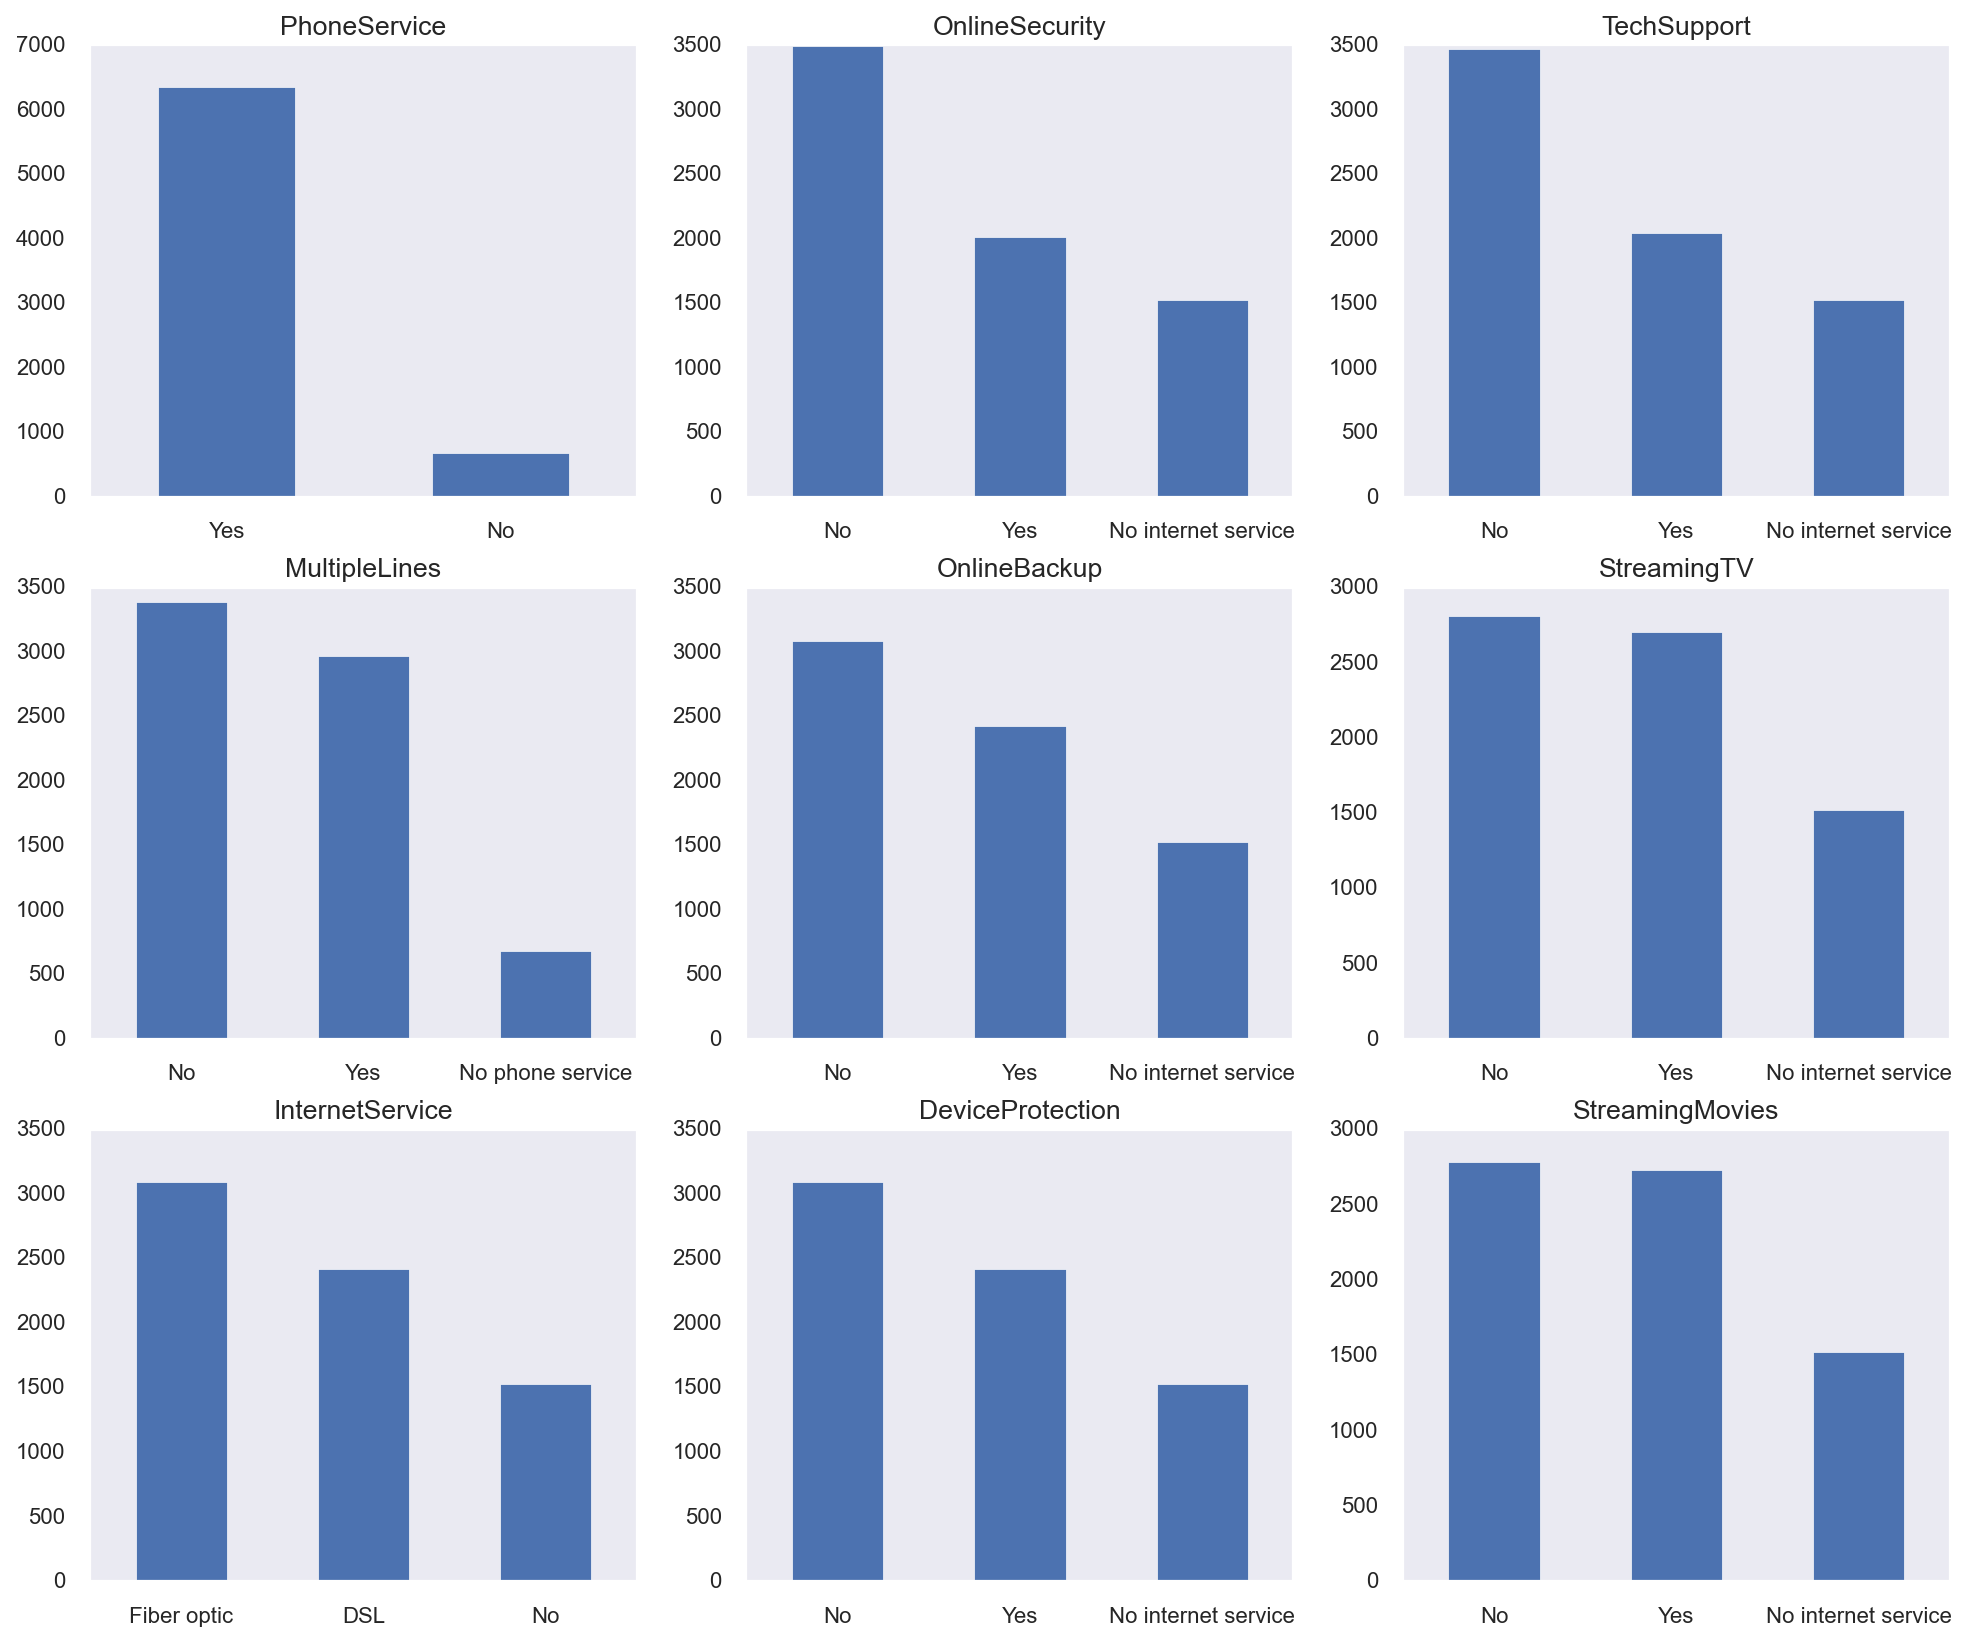

In [258]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Create a 3x3 grid of subplots with a specified figure size
fig, plots = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12));

# Loop through the list of services and plot a bar chart for each service
for i, item in enumerate(services):
    # If the index is less than 3, plot the bar chart in the first column of the corresponding row
    if i < 3:
        ax = telecom_df[item].value_counts().plot(kind = 'bar',ax=plots[i,0],rot = 0);
        
    # If the index is between 3 and 6, plot the bar chart in the second column of the corresponding row
    elif i >=3 and i < 6:
        ax = telecom_df[item].value_counts().plot(kind = 'bar',ax=plots[i-3,1],rot = 0);
        
    # If the index is less than 9, plot the bar chart in the third column of the corresponding row
    elif i < 9:
        ax = telecom_df[item].value_counts().plot(kind = 'bar',ax=plots[i-6,2],rot = 0);
    
    # Set the title of the subplot to the name of the service
    ax.set_title(item);

In [259]:
telecom_df.describe().T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['75%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.000000,2281.916928,2265.270398,18.800000,402.225000,1397.475000,3786.600000,8684.800000


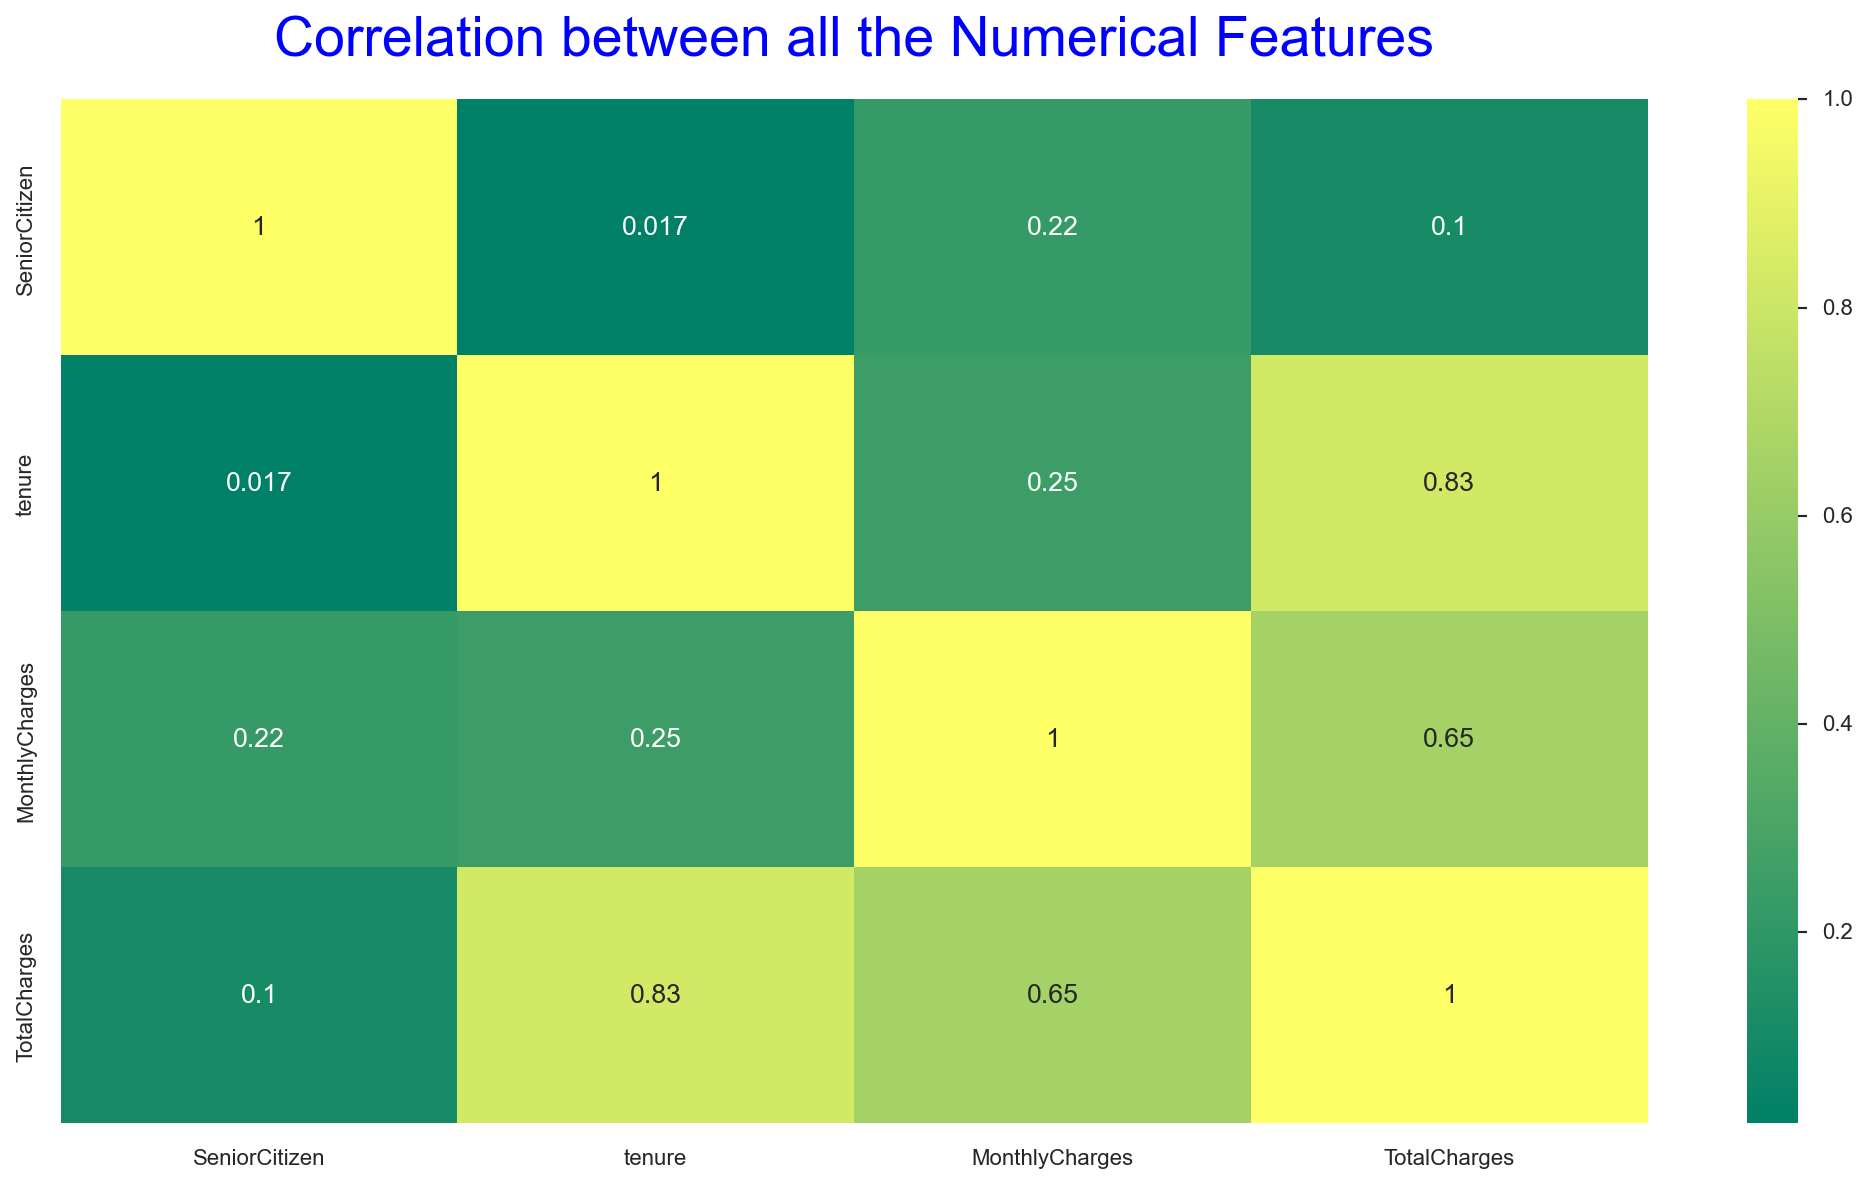

In [260]:
# HeatMap
heat = telecom_df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#0000FF')
sns.heatmap(heat, cmap='summer', annot=True);
plt.show();

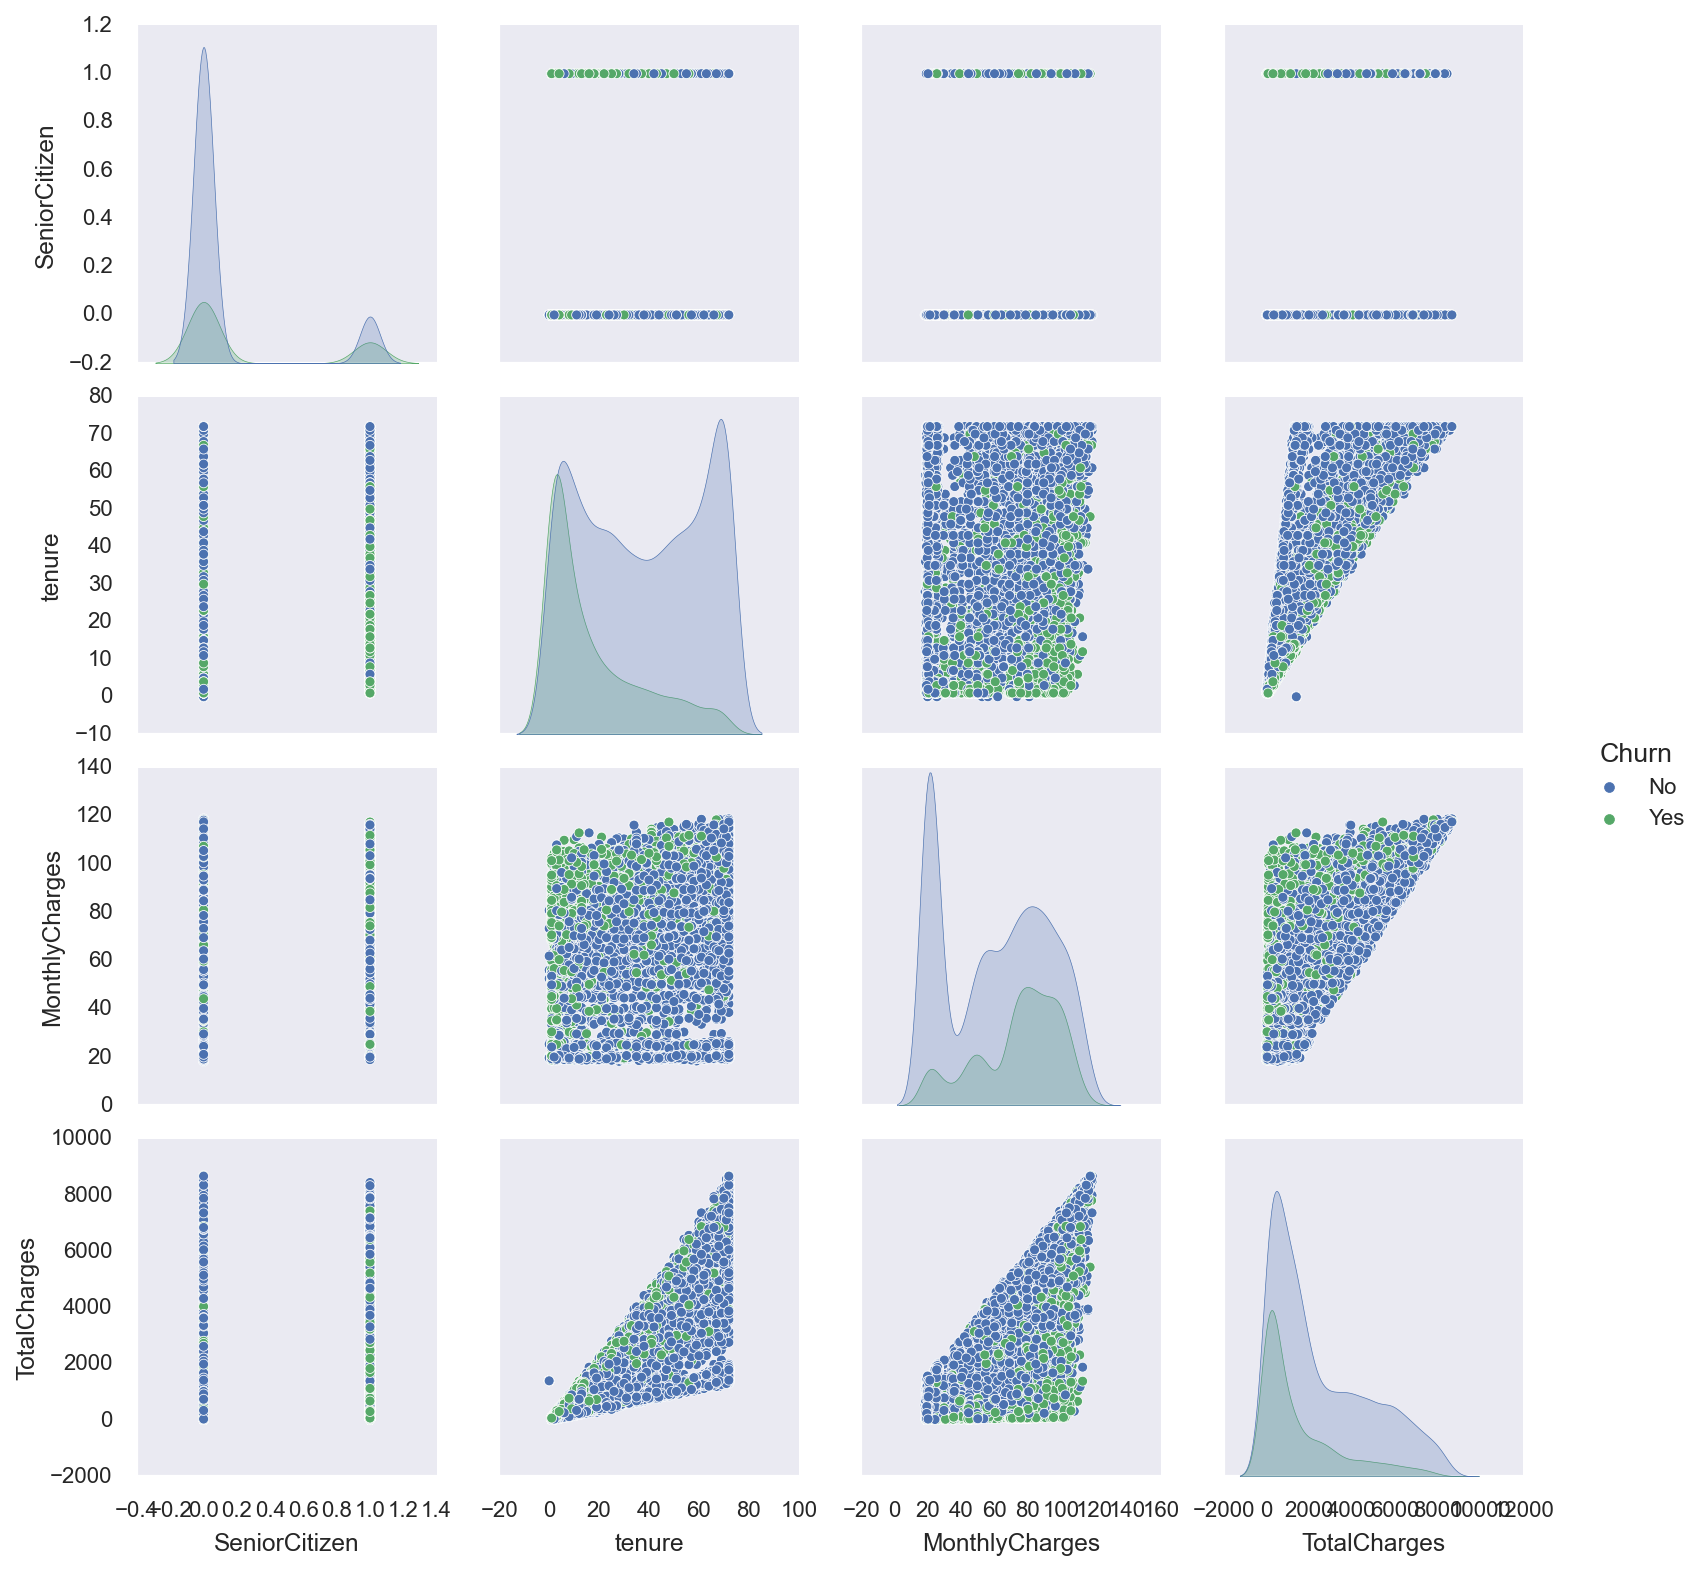

In [261]:
sns.pairplot(telecom_df, hue='Churn');

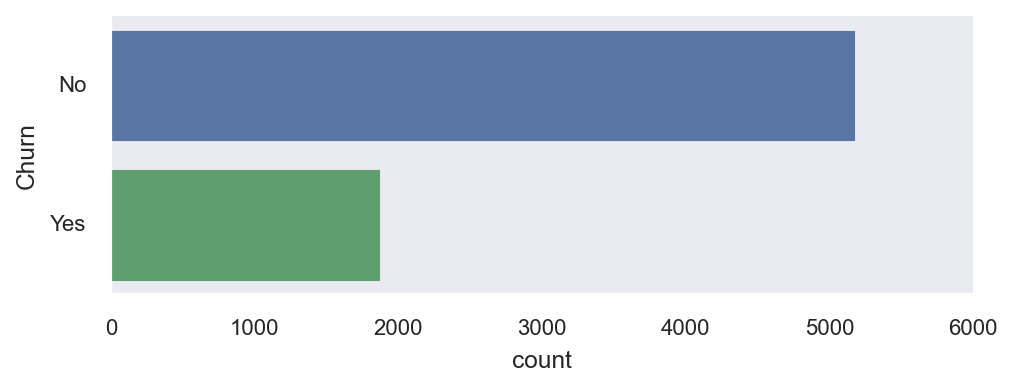

In [262]:
target = sns.catplot(y="Churn", kind="count", data = telecom_df, height=2.6, aspect=2.5, orient='h')

### This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

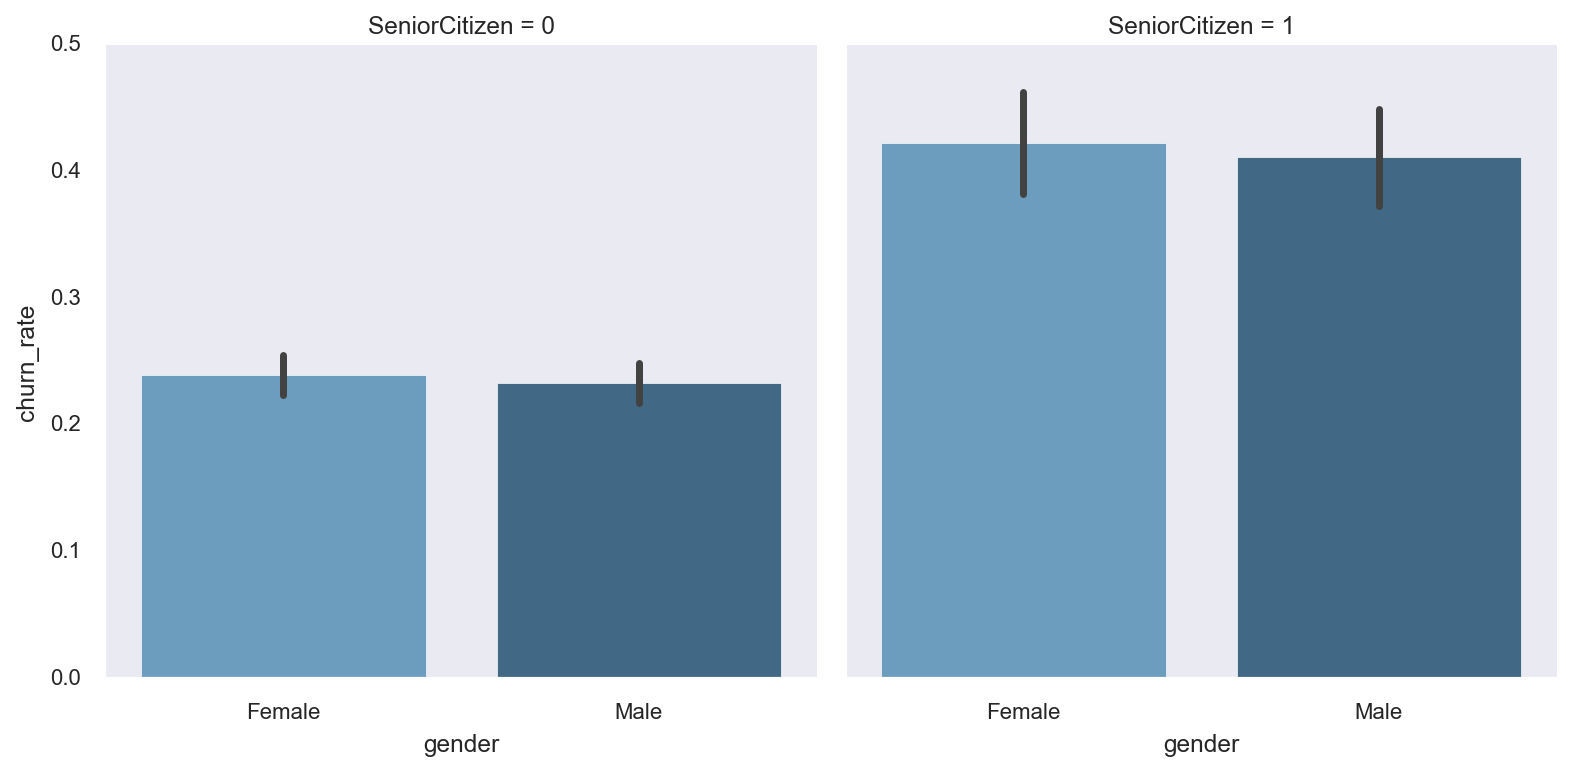

In [263]:
telecom_df['churn_rate'] = telecom_df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telecom_df, col="SeniorCitizen", height=5, aspect=1)
senior = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

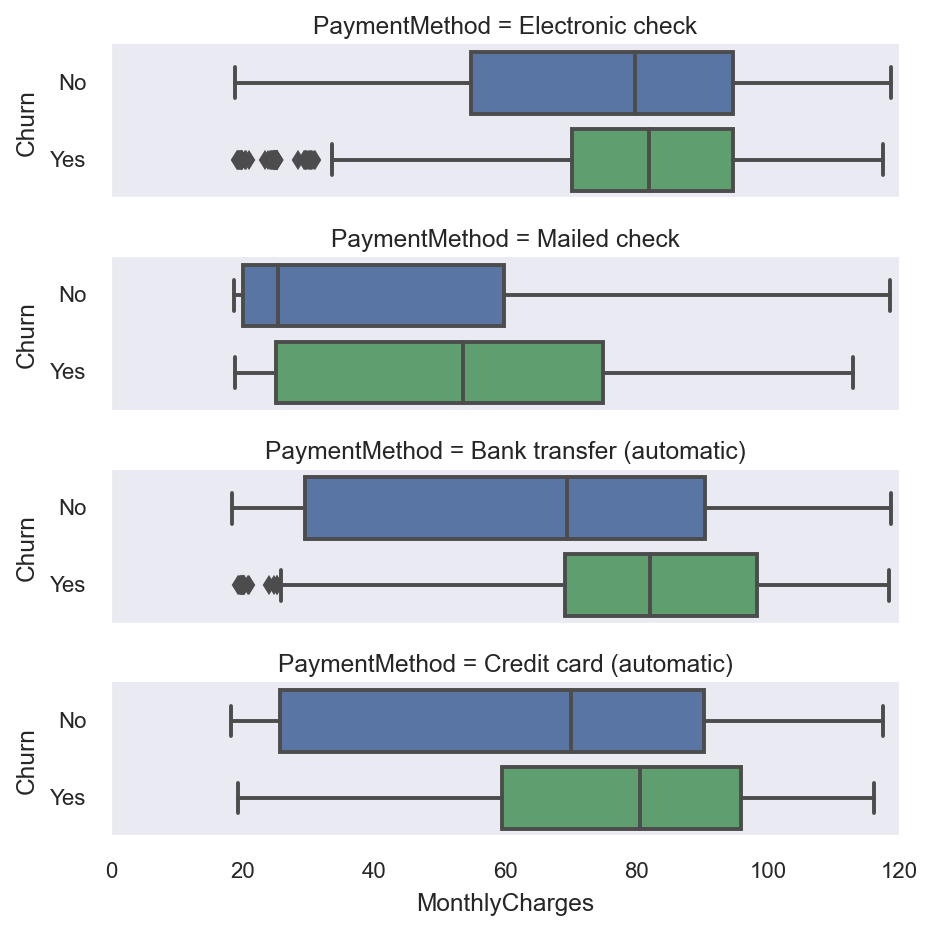

In [264]:
payment = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", 
                      data = telecom_df, height=1.5, aspect=4, orient='h')

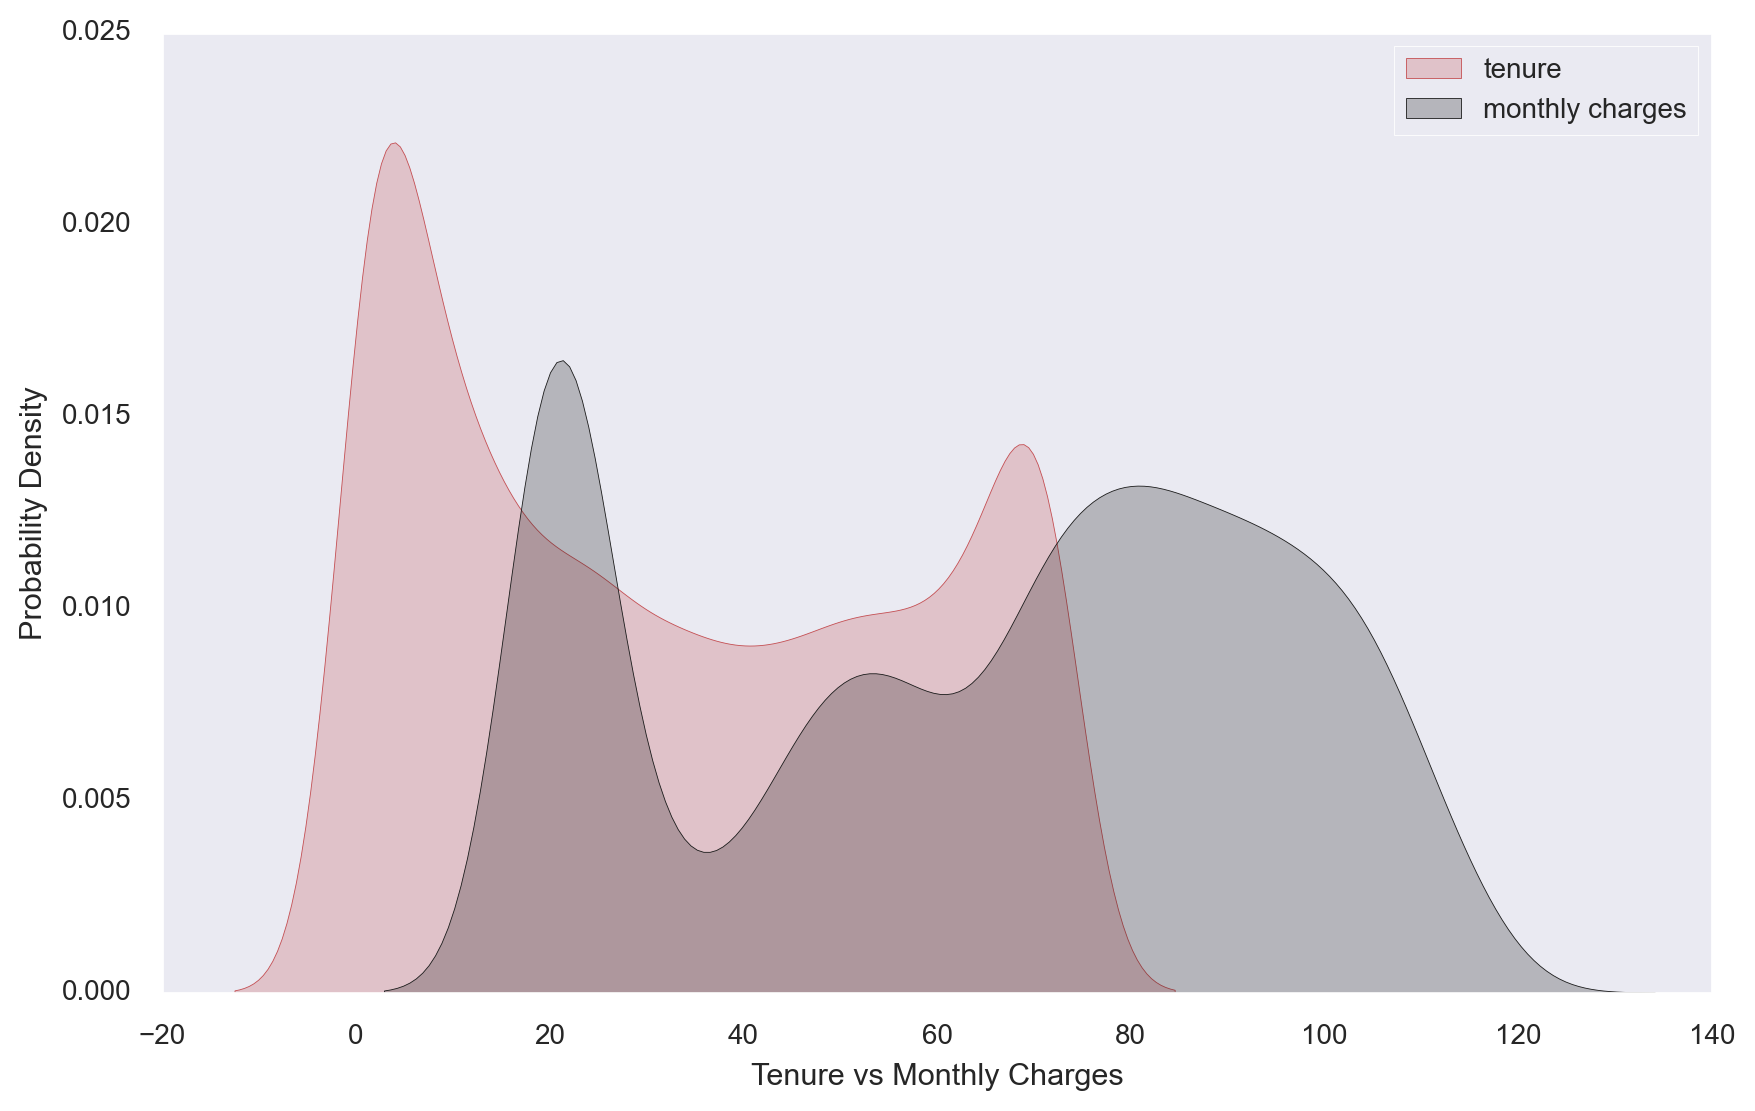

In [265]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(telecom_df.tenure, color='r', shade=True);
sns.kdeplot(telecom_df.MonthlyCharges, color='k', shade=True);
  
plt.xlabel('Tenure vs Monthly Charges');
plt.ylabel('Probability Density');
plt.legend(['tenure','monthly charges']);
plt.show();


### A - Identify the Target Variable and Splitting the Data into Train and Test

In [266]:
# Identifying the inputs (X) and output (y)

y = telecom_df['Churn']
X = telecom_df[['gender','SeniorCitizen','Partner',
          'Dependents','tenure','PhoneService','MultipleLines','InternetService',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
          'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [267]:
y.head()
X.head()
X.shape

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


(7043, 19)

In [268]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 69)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


### B. Separating Categorical and Numerical Columns:

In [269]:
X_train.head()
X_train.dtypes
X_train.MultipleLines.unique()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4262,Male,1,No,No,2,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,94.55
632,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.90
3710,Male,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,242.40
3785,Male,1,Yes,No,10,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.80,914.30
3595,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.20,115.95


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

array(['No', 'Yes', 'No phone service'], dtype=object)

In [270]:
# Categorical columns
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4262,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic)
632,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3710,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
3785,Male,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
3595,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)


In [271]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4262,1,2,66.40,94.55
632,0,72,89.85,6562.90
3710,0,10,20.45,242.40
3785,1,10,89.80,914.30
3595,1,2,70.20,115.95


### c. Scaling the Numerical Features

In [272]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4262,2.25,-1.23,0.05,-0.96
632,-0.44,1.62,0.83,1.90
3710,-0.44,-0.91,-1.48,-0.90
3785,2.25,-0.91,0.83,-0.60
3595,2.25,-1.23,0.18,-0.95


In [273]:
X_train_num_rescaled.describe()
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.44,-1.31,-1.55,-1.00
25%,-0.44,-0.95,-0.97,-0.83
50%,-0.44,-0.17,0.19,-0.39
75%,-0.44,0.93,0.83,0.66
max,2.25,1.62,1.79,2.83


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,0.16,32.25,64.81,2275.03
std,0.37,24.58,30.06,2261.92
min,0.00,0.00,18.25,18.85
25%,0.00,9.00,35.75,401.15
50%,0.00,28.00,70.40,1397.39
75%,0.00,55.00,89.80,3772.25
max,1.00,72.00,118.75,8672.45


In [274]:
print("Number of Numerical Features:", scaler.n_features_in_)
print('--'*50)
print("Mean of each column:", scaler.mean_)
print('--'*50)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
----------------------------------------------------------------------------------------------------
Mean of each column: [1.64521015e-01 3.22491480e+01 6.48070996e+01 2.27503168e+03]
----------------------------------------------------------------------------------------------------
Std of each column: [3.70747691e-01 2.45776598e+01 3.00565556e+01 2.26171017e+03]


### d. Applying OneHotEncoding on Categorical Columns

In [275]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4262,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
632,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
3710,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3785,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3595,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### E. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [276]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4262,2.25,-1.23,0.05,-0.96,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
632,-0.44,1.62,0.83,1.90,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
3710,-0.44,-0.91,-1.48,-0.90,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3785,2.25,-0.91,0.83,-0.60,1.00,1.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3595,2.25,-1.23,0.18,-0.95,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### F.Preparing Test Data

In [277]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5725,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
5124,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
2462,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic)
1590,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check
633,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


In [278]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5725,0,18,24.65,471.35
5124,0,25,20.10,486.05
2462,0,1,70.45,70.45
1590,0,63,19.35,1263.85
633,0,10,20.35,176.30


In [279]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5725,-0.44,-0.58,-1.34,-0.80
5124,-0.44,-0.29,-1.49,-0.79
2462,-0.44,-1.27,0.19,-0.97
1590,-0.44,1.25,-1.51,-0.45
633,-0.44,-0.91,-1.48,-0.93


In [280]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5725,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
5124,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2462,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
1590,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
633,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [281]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5725,-0.44,-0.58,-1.34,-0.80,0.00,1.00,1.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
5124,-0.44,-0.29,-1.49,-0.79,0.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2462,-0.44,-1.27,0.19,-0.97,1.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
1590,-0.44,1.25,-1.51,-0.45,0.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
633,-0.44,-0.91,-1.48,-0.93,1.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Classification Algorithms

### Logistic Regression

In [282]:
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [283]:
y_test_pred = classifier.predict(X_test_transformed)

In [284]:
churn_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_LR.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [285]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1313
         Yes       0.66      0.54      0.60       448

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.81      0.81      0.81      1761



In [286]:
A = metrics.accuracy_score(y_test, y_test_pred)

In [287]:
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8143100511073254


### KNN Classifier

In [288]:
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=11)

In [289]:
y_test_pred = classifier.predict(X_test_transformed)

In [290]:
churn_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_KNN.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [291]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1313
         Yes       0.57      0.55      0.56       448

    accuracy                           0.78      1761
   macro avg       0.71      0.70      0.71      1761
weighted avg       0.78      0.78      0.78      1761



In [292]:
B = metrics.accuracy_score(y_test, y_test_pred)

In [293]:
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.78137421919364


### Support Vector Classifier

In [294]:
classifier = SVC(random_state=1)
classifier.fit(X_train_transformed, y_train)

SVC(random_state=1)

In [295]:
y_test_pred = classifier.predict(X_test_transformed)

In [296]:
churn_SVC = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_SVC.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [297]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1313
         Yes       0.69      0.48      0.57       448

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761



In [298]:
C = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8126064735945485


### Decision Tree Classifier

In [299]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [300]:
y_test_pred = classifier.predict(X_test_transformed)

In [301]:
churn_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_DT.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [302]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.85      0.80      0.82      1313
         Yes       0.49      0.58      0.53       448

    accuracy                           0.74      1761
   macro avg       0.67      0.69      0.68      1761
weighted avg       0.76      0.74      0.75      1761



In [303]:
D = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7421919363997729


### Random Forest Classifier

In [304]:
classifier = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=50)

In [305]:
y_test_pred = classifier.predict(X_test_transformed)

In [306]:
churn_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_RF.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [307]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1313
         Yes       0.67      0.46      0.54       448

    accuracy                           0.80      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.79      0.80      0.79      1761



In [308]:
E = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.80465644520159


### Gradient Boosting Classifier

In [309]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [310]:
y_test_pred = classifier.predict(X_test_transformed)

In [311]:
churn_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_GB.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,Yes
1590,No,No
633,No,No


In [312]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1313
         Yes       0.66      0.54      0.59       448

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.81      1761



In [313]:
F = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8120386144236229


### AdaBoostClassifier

In [314]:
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [315]:
y_test_pred = classifier.predict(X_test_transformed)

In [316]:
churn_ADB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_ADB.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


In [317]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1313
         Yes       0.64      0.57      0.60       448

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [318]:
G = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8080636002271436


### Voting Classifier

In [319]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train_transformed, y_train)
predictions = eclf1.predict(X_test_transformed)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('abc', AdaBoostClassifier())],
                 voting='soft')

Final Accuracy Score 
0.814877910278251


In [320]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1313
         Yes       0.67      0.53      0.59       448

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.81      0.81      0.81      1761



In [ ]:
F = accuracy_score(y_test, predictions)

### Creating Dataframe to visualize the results

In [337]:
 Churn_default = {"Algorithm": ["LogisticRegression", " KNeighborsClassifier",'SV Classifier', " DT Classifier", "Random Forest Classifier", "Gradient-Boosting Classifier",'AdaBoostClassifier','voting Classifier'],
           "Classification": ["Logit", "K-Nearest",'Support Vector', "Decision-Tree", "Ensemble", "Boosting","Boosting",'Ensemble'],
           "Accuracy": [A,B,C,D,E,F,G,F]}

In [338]:
Churn_final = pd.DataFrame(Churn_default)

In [339]:
Churn_final

,Algorithm,Classification,Accuracy
0,LogisticRegression,Logit,0.81
1,KNeighborsClassifier,K-Nearest,0.78
2,SV Classifier,Support Vector,0.81
3,DT Classifier,Decision-Tree,0.74
4,Random Forest Classifier,Ensemble,0.80
5,Gradient-Boosting Classifier,Boosting,0.81
6,AdaBoostClassifier,Boosting,0.81
7,voting Classifier,Ensemble,0.81


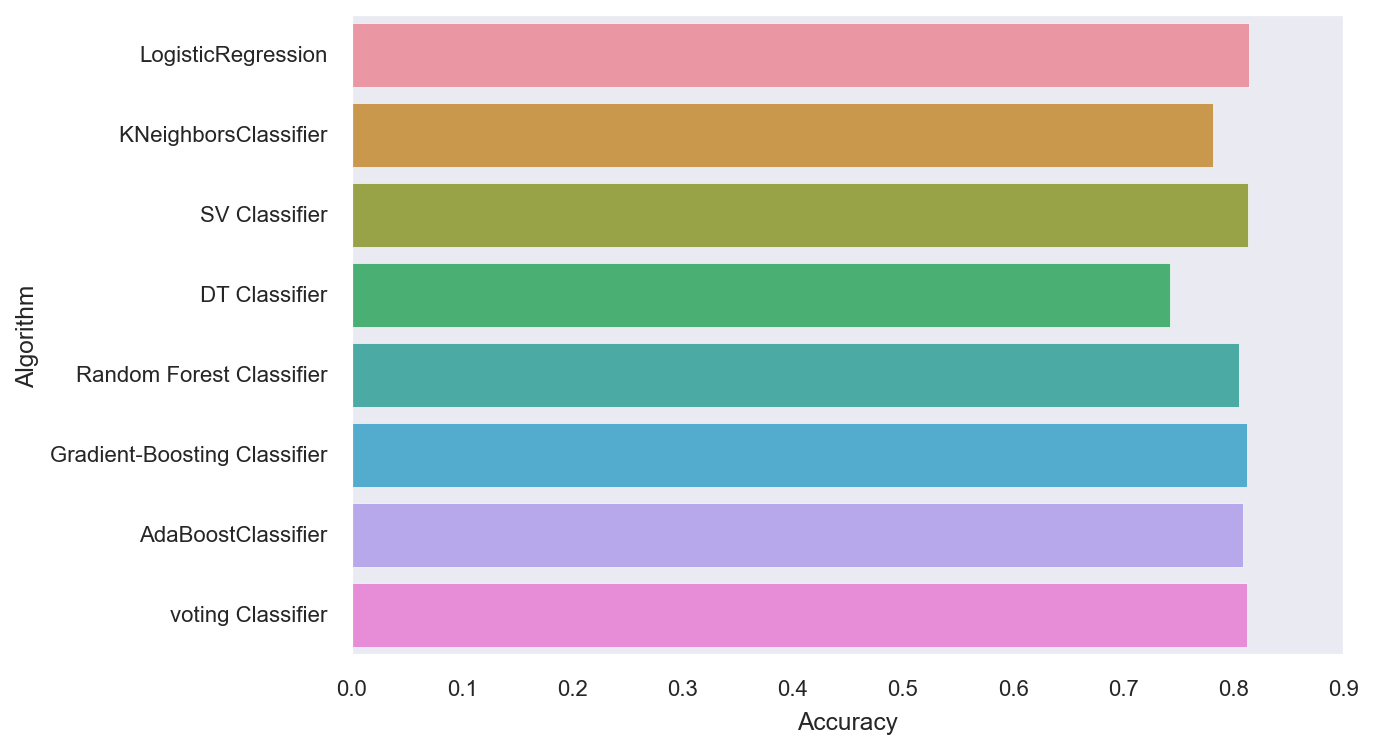

In [340]:
plt.figure(figsize=(8,5))

sns.barplot( x = 'Accuracy',y ='Algorithm' , data = Churn_final,orient ='h');


*  The results of the evaluation using `Accuracy` as the metric show that **`LogisticRegression`** outperformed the other models, with a score of **81.4**

`GB & SVC` had the second-best performance, with a score of **81.2**


####  These results suggest that **`LogisticRegression`** may be the most effective model for this particular task, 
      Although further evaluation and validation is necessary to confirm this conclusion.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers.

This includes identifying customers who are at risk of churning and working to improve their satisfaction. 

Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. 

Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.